# Data Import

This script is designed to import exoplanetary data from the [Planetary Systems Composite Data](https://exoplanetarchive.ipac.caltech.edu/cgi-bin/TblView/nph-tblView?app=ExoTbls&config=PSCompPars) catalog, with the objective of analyzing the evolution of key distributions presented in studies by Fulton et *al*. (2017), Burn et *al*. (2023), and Luque & Palle (2022). In particular, this work aims to investigate the impact of incorporating recent TESS data on the study of radii valley.


## Primary Data Import and Initial Processing

In this section, we perform the initial import of the complete dataset without applying any filtering criteria, except from detection facility creteria. The objective is to ensure that all available parameters are correctly loaded and structured for subsequent analysis, and that we will be able to differntiate satelites' discoveries. 


In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib.ticker import ScalarFormatter
from IPython.display import display, HTML

from filter_function import *

In [2]:
full_data = pd.read_csv(
    r"C:\Users\simon\OneDrive\Bureau\Stage\Dataset\Confirmed_Data.csv",
    skiprows=88
)
full_data.columns = full_data.columns.str.strip()


In [10]:
kepler_sample = apply_filters(full_data, 
                        mission='Kepler',
                        date_max=2017,
                        Teff_min=4500, Teff_max=6500)


kepler_sample_2017 = apply_filters(full_data, 
                        mission='Kepler',
                        date_max=2017,
                        b=0.7, kp=14.2,
                        Teff_min=4500, Teff_max=6500)


Mdwarf_sample_2021 = apply_filters(full_data,
                            date_max=2021)

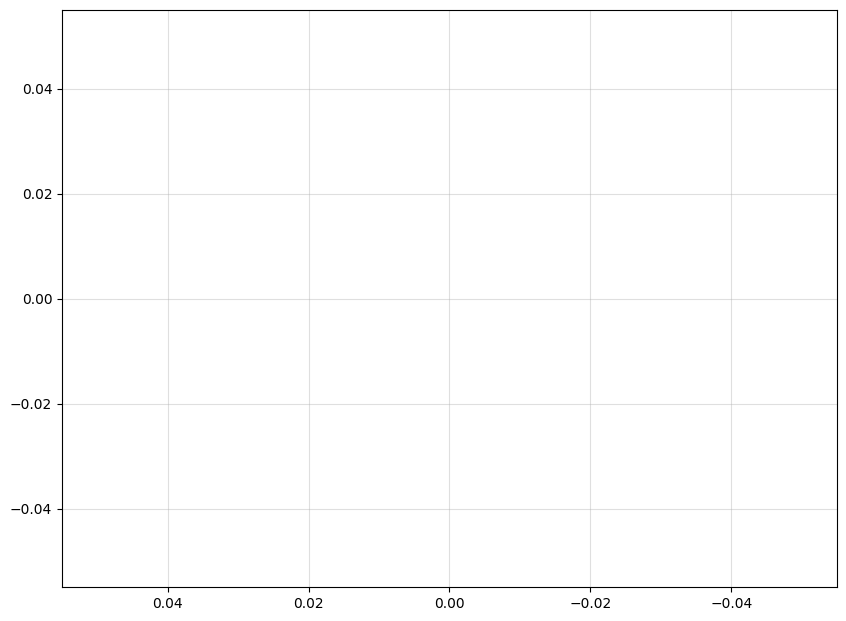

In [11]:
# kepler_sample_2017


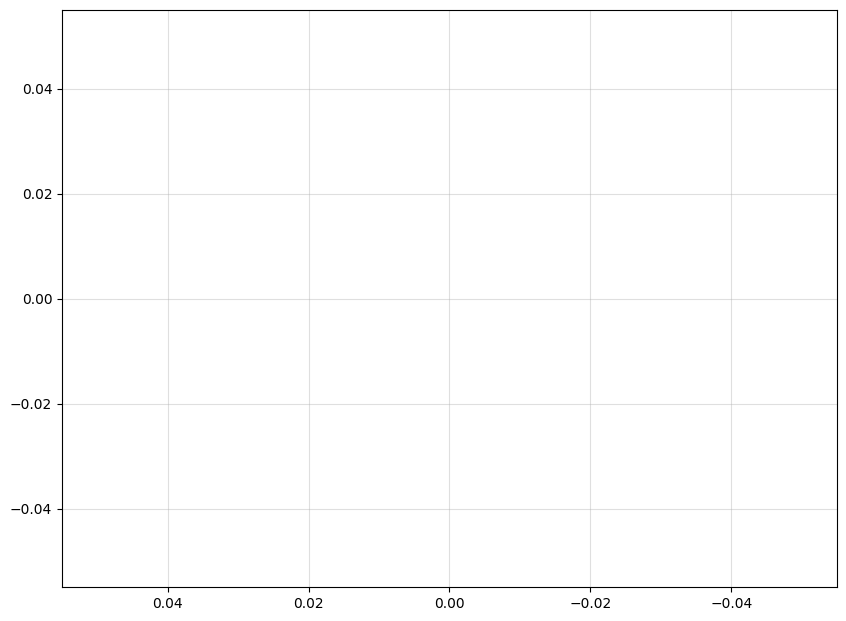

In [12]:
plot_sample_stellar_radi_vs_teff(kepler_sample, kepler_sample_2017)

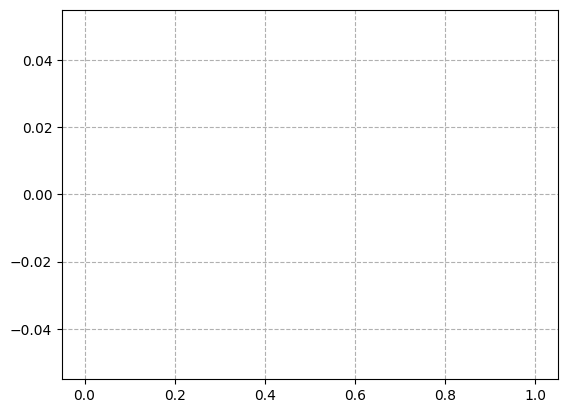

In [13]:
plot_radii_vs_mass_Mtype(Mdwarf_sample_2021)

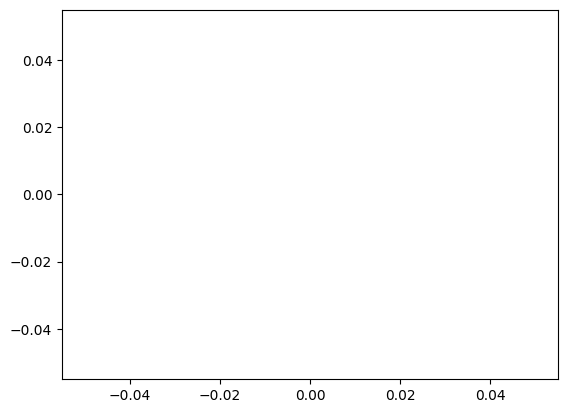

In [14]:
plot_histogram(full_data)
